In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from binance.client import Client
from config import *

client = Client(api_key, api_secret)

In [85]:
def get_b_s(minutos, lista, n, disp=False):
    
    D = {}
    for m in minutos:
        B = []
        S = []
        for l in lista:
            if m in l:
                data = [i.strip() for i in l.strip().split("|") if i!=""][2:]
                if len(data)>=n:
                    info = data[n-1] ### data
                    side, val = info.split(" ")
                    valor = float(val.replace("%", ""))
                    if "y" in side:
                        B.append(valor)
                    else:
                        S.append(valor)
        if len(B)==0:
            B+=[0]
        if len(S)==0:
            S+=[0]
        if disp:
            print(m)
            print("Buy:", B)
            print("Sell:", S)
        pb = np.array(B).mean()
        ps = np.array(S).mean()
        D[m] = {'buy':pb, 'sell':ps}
    # D

    bu = []
    se = []
    for d in D:
        dicc = D[d]
        compra = dicc['buy']/100
        venta = dicc['sell']/100
        bu.append(compra)
        se.append(venta)
    return bu, se, D

In [166]:
# 'DOT', 'ADA', 'DOGE'
coins = ['DOT', 'ADA', 'DOGE']
kh = 2
archivo = open(f'{coins[kh]}.txt', "r")
lista = archivo.readlines()
archivo.close()
# print(lista[0])
# print()
# print(lista[-1])
# lista

lx = [":".join(i.split(" |")[0].split(":")[:-1]) for i in lista]
minutos = []
for i in lx:
    if i not in minutos:
        minutos.append(i)
# minutos
lista[0], lista[-1]

('Tue Dec  7 08:16:00 2021 | 2 | Buy: 73.0% | Buy: 75.0% | \n',
 'Tue Dec  7 12:47:12 2021 | 56 | Sell: 60.0% | Sell: 63.0% | Sell: 58.0% | Buy: 54.0% | Sell: 52.0% | Buy: 52.0% | Buy: 51.0% | Sell: 52.0% | Sell: 52.0% | Buy: 51.0% | Buy: 51.0% | Buy: 52.0% | Sell: 57.0% | Sell: 54.0% | Sell: 54.0% | Sell: 55.0% | Sell: 54.0% | Sell: 55.0% | Buy: 50.0% | Buy: 50.0% | Sell: 52.0% | Buy: 52.0% | Buy: 54.0% | Buy: 54.0% | Buy: 54.0% | Buy: 53.0% | Buy: 53.0% | Buy: 52.0% | Buy: 51.0% | Buy: 51.0% | Buy: 52.0% | Buy: 51.0% | Buy: 52.0% | Buy: 53.0% | Buy: 53.0% | Buy: 53.0% | Buy: 53.0% | Buy: 64.0% | Buy: 65.0% | Buy: 65.0% | Buy: 66.0% | Buy: 66.0% | Buy: 65.0% | Sell: 51.0% | Sell: 51.0% | Buy: 51.0% | Buy: 52.0% | Buy: 52.0% | Buy: 53.0% | Buy: 53.0% | Buy: 53.0% | Buy: 50.0% | Buy: 50.0% | Buy: 51.0% | Sell: 51.0% | Buy: 50.0% | \n')

In [167]:
L3m = client.futures_historical_klines(
    symbol=f'{coins[kh]}USDT',
    interval='1m',
    start_str='12-07-2021 07:00:00',
    end_str='12-07-2021 17:47:00',
    # limit=40
)

arr_l = np.array(L3m).astype(np.float64)
index = pd.DatetimeIndex(pd.to_datetime(arr_l[:, 0], unit='ms'))#.tz_localize('UTC')#.tz_convert('America/Lima')
df_serie = pd.DataFrame(arr_l[:, 4], index=index)
SS = np.array(df_serie[0])
SS.shape

(272,)

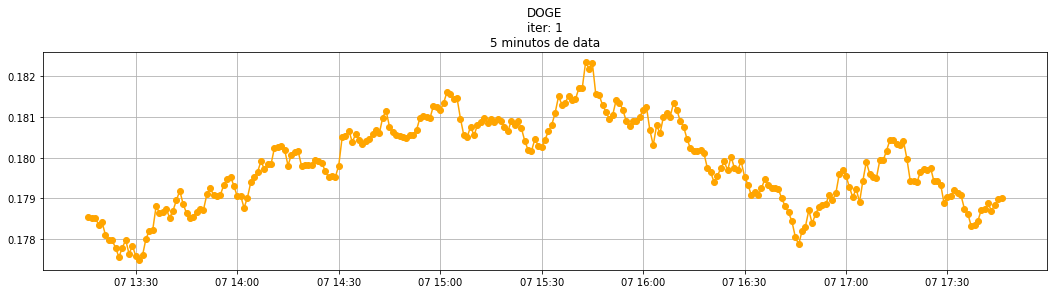

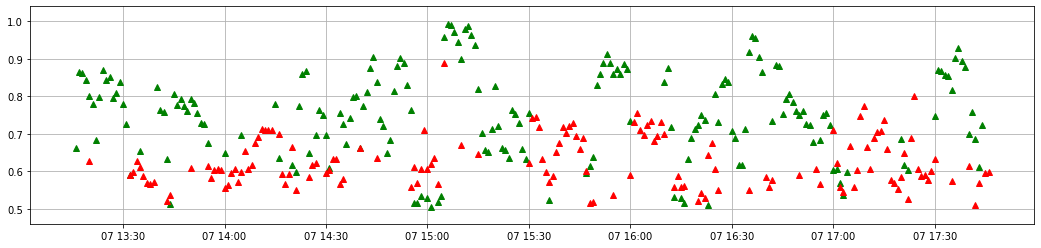

-------------------------------------------------------------------------------------------------------------------



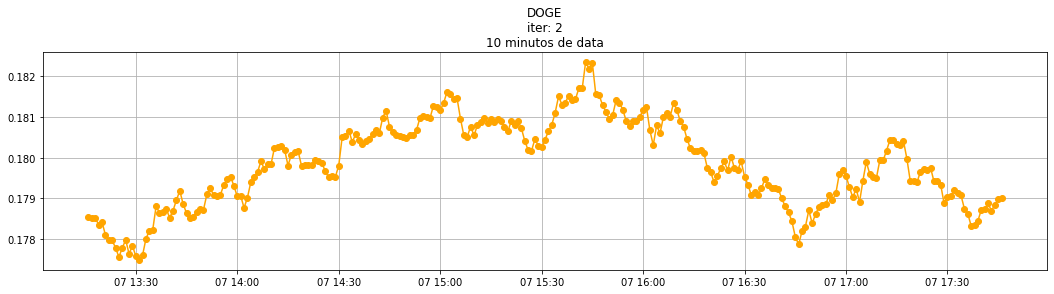

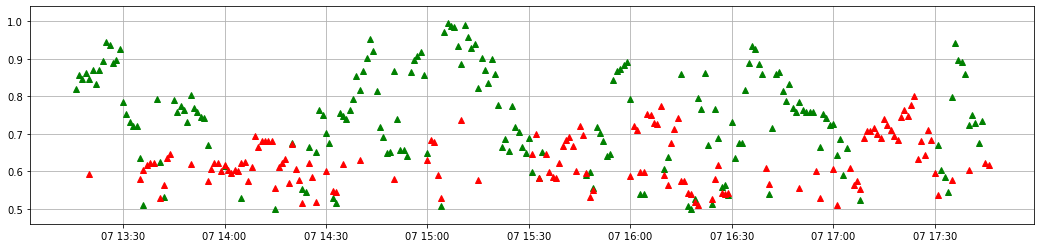

-------------------------------------------------------------------------------------------------------------------



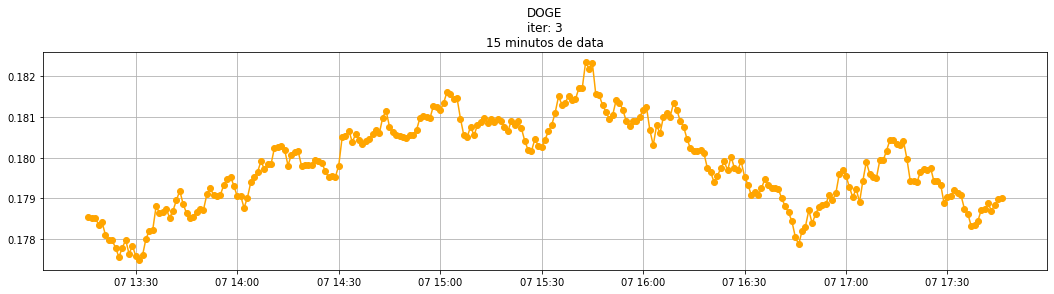

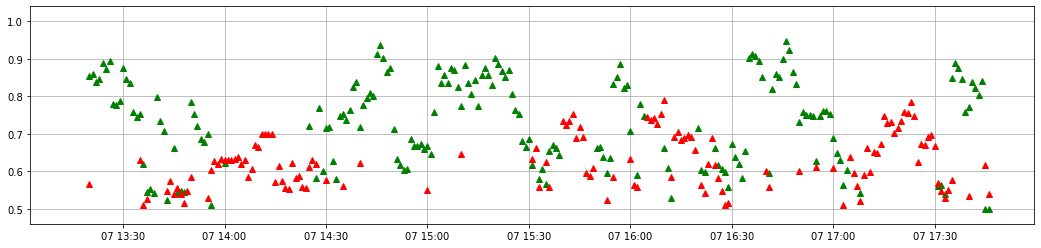

-------------------------------------------------------------------------------------------------------------------



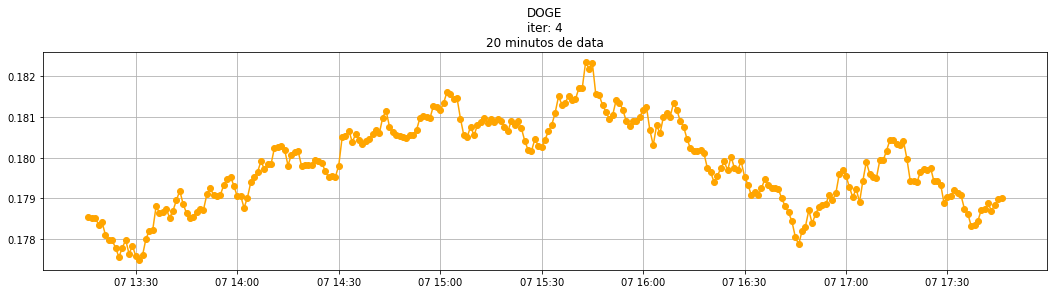

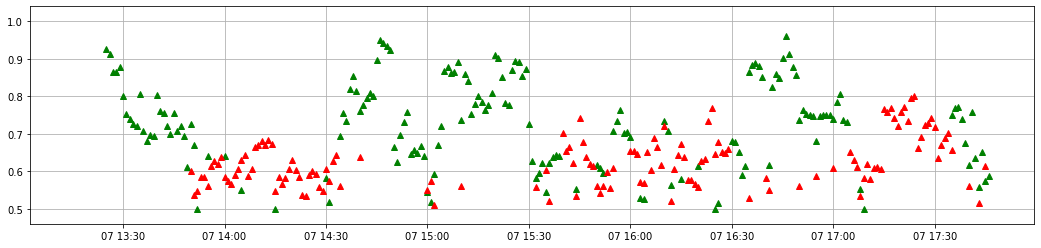

-------------------------------------------------------------------------------------------------------------------



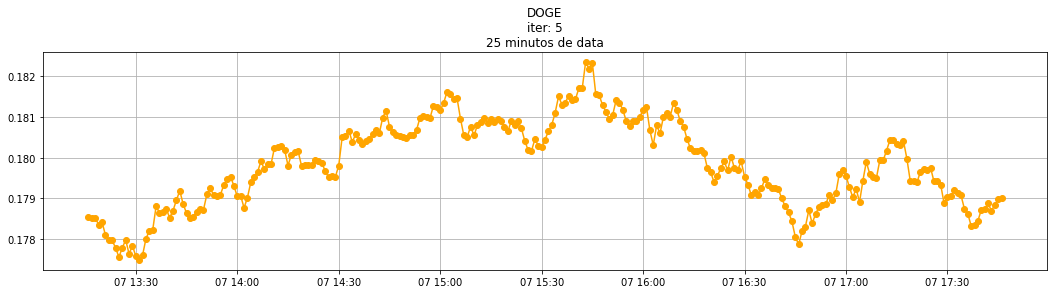

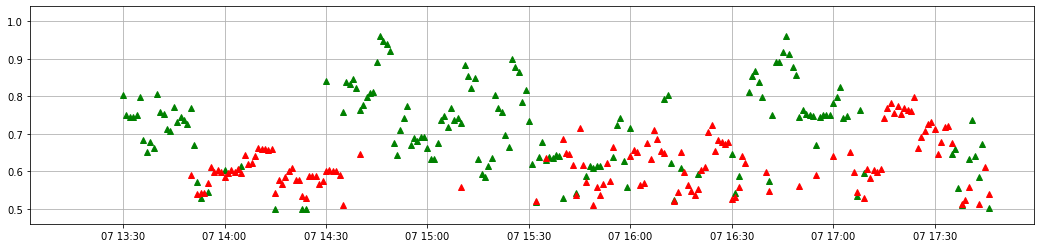

-------------------------------------------------------------------------------------------------------------------



In [188]:
for n in range(1, 6):
    # w = 150
    # ww = 75
    # n = 9
    w = 0
    ww = 1
    plt.figure(figsize=(18, 4))
    # plt.plot(index.to_list()[:w], SS[:w], c='orange')
    plt.plot(index.to_list()[w:-ww], SS[w:-ww], c='orange')
    plt.plot(index.to_list()[w:-ww], SS[w:-ww], "o", c='orange')
    plt.grid()
    plt.title(f"{coins[kh]}\niter: {n}\n{n*5} minutos de data")
    plt.show()

    plt.figure(figsize=(18, 4))
    bu, se, _ = get_b_s(minutos, lista, n)
    # plt.plot(index.to_list()[:w], bu[:w], "^", c='green')
    # plt.plot(index.to_list()[:w], se[:w], "^", c='red')
    plt.plot(index.to_list()[w:-ww], bu[w:-ww], "^", c='green')
    plt.plot(index.to_list()[w:-ww], se[w:-ww], "^", c='red')
    plt.ylim(.46, 1.04)
    plt.grid()
    plt.show()
    print("-------------------------------------------------------------------------------------------------------------------")
    print()

In [139]:
bu, se, _ = get_b_s(minutos, lista, 5)
_

{'Tue Dec  7 08:16': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:17': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:18': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:19': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:20': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:21': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:22': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:23': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:24': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:25': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:26': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:27': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:28': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:29': {'buy': 0.0, 'sell': 0.0},
 'Tue Dec  7 08:30': {'buy': 80.39655172413794, 'sell': 0.0},
 'Tue Dec  7 08:31': {'buy': 75.01785714285714, 'sell': 0.0},
 'Tue Dec  7 08:32': {'buy': 74.57894736842105, 'sell': 0.0},
 'Tue Dec  7 08:33': {'buy': 74.57894736842105, 'sell': 0.0},
 'Tue Dec  7 08:34': {'buy': 75.0, 'sell': 0.0},
 'Tue Dec  7 08:35': {'buy': 79

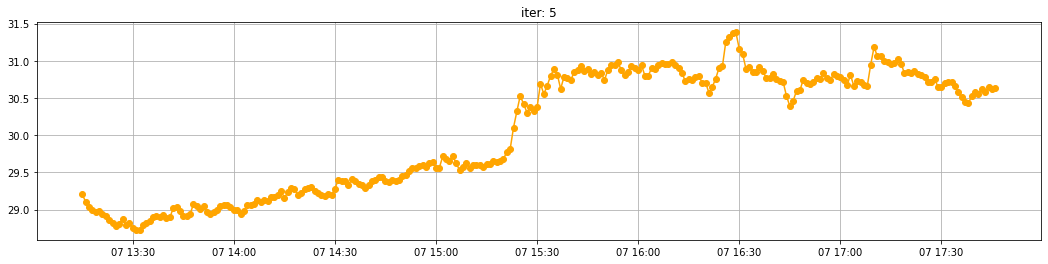

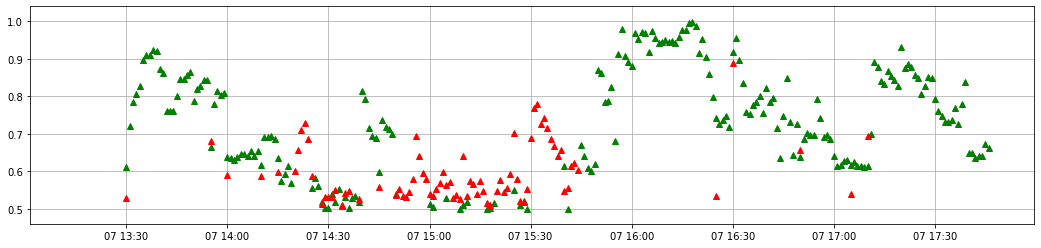

In [55]:
w = 0
ww = 1
n = 5
plt.figure(figsize=(18, 4))
# plt.plot(index.to_list()[:w], SS[:w], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], "o", c='orange')
plt.grid()
plt.title(f"iter: {n}")
plt.show()

plt.figure(figsize=(18, 4))
bu, se, _ = get_b_s(minutos, lista, n)
# plt.plot(index.to_list()[:w], bu[:w], "^", c='green')
# plt.plot(index.to_list()[:w], se[:w], "^", c='red')
plt.plot(index.to_list()[w:-ww], bu[w:-ww], "^", c='green')
plt.plot(index.to_list()[w:-ww], se[w:-ww], "^", c='red')
plt.ylim(.46, 1.04)
plt.grid()
plt.show()

In [78]:
bu, se, _ = get_b_s(minutos, lista, 4, 1)
# _

Tue Dec  7 08:15
Buy: [0]
Sell: [0]
Tue Dec  7 08:16
Buy: [0]
Sell: [0]
Tue Dec  7 08:17
Buy: [0]
Sell: [0]
Tue Dec  7 08:18
Buy: [0]
Sell: [0]
Tue Dec  7 08:19
Buy: [0]
Sell: [0]
Tue Dec  7 08:20
Buy: [0]
Sell: [0]
Tue Dec  7 08:21
Buy: [0]
Sell: [0]
Tue Dec  7 08:22
Buy: [0]
Sell: [0]
Tue Dec  7 08:23
Buy: [0]
Sell: [0]
Tue Dec  7 08:24
Buy: [0]
Sell: [0]
Tue Dec  7 08:25
Buy: [65.0, 69.0, 66.0, 69.0, 69.0, 71.0, 72.0, 68.0, 69.0, 68.0, 67.0, 65.0, 68.0, 68.0, 70.0, 68.0, 68.0, 68.0, 69.0, 68.0, 68.0, 69.0, 69.0, 68.0, 68.0, 69.0, 68.0, 70.0, 70.0, 68.0, 69.0, 69.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 70.0, 70.0, 72.0, 73.0, 73.0, 72.0, 72.0, 72.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 70.0, 70.0, 71.0, 68.0]
Sell: [0]
Tue Dec  7 08:26
Buy: [66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 64.0, 64.0, 66.0, 66.0, 65.0, 66.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 66.0, 66.0, 65.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64

Sell: [70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 70.0, 69.0, 69.0, 69.0, 69.0, 69.0, 68.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 68.0, 68.0, 68.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0]
Tue Dec  7 09:24
Buy: [0]
Sell: [68.0, 67.0, 66.0, 66.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 63.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 60.0, 60.0, 60.0, 60.0, 61.0, 60.0, 60.0, 60.0, 61.0, 60.0, 59.0, 59.0, 59.0, 61.0, 60.0, 60.0, 59.0, 61.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0]
Tue Dec  7 09:25
Buy: [72.0, 52.0, 54.0, 55.0, 55.0, 55.0, 55.0, 53.0, 55.0, 55.0]
Sell: [67.0, 67.0, 73.0, 72.0, 63.0, 57.0, 60.0, 57.0, 64.0, 61.0, 60.0, 60.0, 59.0, 59.0, 55.0, 57.0, 56.0, 58.0, 60.0, 59.0, 57.0, 57.0, 58.0, 62.0, 62.0, 61.0, 62.0, 59.0, 58.0, 57.0, 54.0, 54.0, 54.0]
Tue Dec  7 09:26
Buy: [55.0, 55.0, 53.0, 54.0, 52.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 54.0, 54.0, 54.0, 53.0, 52.0, 52.0, 5

Tue Dec  7 10:02
Buy: [0]
Sell: [58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 60.0, 57.0, 60.0, 60.0, 60.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 58.0]
Tue Dec  7 10:03
Buy: [0]
Sell: [58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 61.0, 62.0, 61.0, 62.0, 61.0, 62.0, 62.0]
Tue Dec  7 10:04
Buy: [0]
Sell: [62.0, 62.0, 62.0, 64.0, 64.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0, 62.0, 62.0, 62.0, 64.0, 62.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 66.0, 64.0, 66.0, 62.0, 62.0, 64.0, 64.0, 64.0, 63.0, 63.0, 62.0, 62.0, 62.0, 61.0, 61.0]
Tue Dec  7 10:05
Buy: [65.0, 53.0, 50.0, 52.0, 52.0, 51.0, 50.0]
Sell: [52.0, 55.0, 51.0, 53.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 60.0, 60.0, 60.0, 6

Tue Dec  7 10:52
Buy: [88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 86.0, 87.0, 86.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0, 82.0, 80.0, 82.0, 77.0, 81.0, 82.0, 82.0, 82.0, 80.0, 81.0, 80.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0]
Sell: [0]
Tue Dec  7 10:53
Buy: [82.0, 82.0, 81.0, 81.0, 81.0, 82.0, 81.0, 80.0, 80.0, 82.0, 81.0, 80.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0, 82.0, 85.0, 85.0, 86.0, 86.0, 85.0, 85.0, 85.0, 85.0, 86.0]
Sell: [0]
Tue Dec  7 10:54
Buy: [86.0, 86.0, 87.0, 86.0, 86.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 85.0, 87.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0]
Sell: [0]
Tue Dec  7 10:55
Buy: [70.0, 90.0, 85.0, 84.0, 85.0, 83.0, 74.0, 78.0, 76.0, 77.0, 79.0, 79.0, 79.0, 81.0, 79.0, 79.0, 77.0, 75.0, 75.0, 81.0, 79.0, 80.0, 81.0, 83.0, 80.0, 78.0, 74.0, 77.0, 77.0, 79.0, 80.0, 80.0, 81.0, 82.0]
Sell: [0]
Tue Dec  7 10:56
Buy: [84.0, 85.0, 84.0, 85.0, 85.0, 84.0, 83.0,

Tue Dec  7 12:21
Buy: [92.0, 91.0, 91.0, 91.0, 89.0, 90.0, 89.0, 90.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 89.0, 89.0, 88.0, 89.0, 88.0, 88.0, 88.0, 88.0, 88.0]
Sell: [0]
Tue Dec  7 12:22
Buy: [88.0, 89.0, 89.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0]
Sell: [0]
Tue Dec  7 12:23
Buy: [92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 88.0, 88.0, 88.0]
Sell: [0]
Tue Dec  7 12:24
Buy: [88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 89.0, 89.0, 88.0, 88.0, 89.0, 88.0, 88.0, 90.0, 90.0, 90.0, 89.0, 89.0, 89.0, 90.0, 89.0, 89.0, 90.0, 89.0, 90.0]
Sell: [0]
Tue Dec  7 12:25
Buy: [90.0, 85.0, 80.0, 74.0, 84.0, 81.0, 79.0, 84.0, 81.0, 82.0, 83.0, 79.0, 76.0, 80.0, 79.0, 79.0, 77.0, 77.0, 78.0, 78.0, 75.0, 69.0, 68.0, 67.0, 67.0, 64.0, 66.0]
Sell: [0]
Tue Dec  7 12

In [75]:
bu, se, _ = get_b_s(minutos, lista, 5, 1)
# _

Tue Dec  7 08:15
Buy: [0]
Sell: [0]
Tue Dec  7 08:16
Buy: [0]
Sell: [0]
Tue Dec  7 08:17
Buy: [0]
Sell: [0]
Tue Dec  7 08:18
Buy: [0]
Sell: [0]
Tue Dec  7 08:19
Buy: [0]
Sell: [0]
Tue Dec  7 08:20
Buy: [0]
Sell: [0]
Tue Dec  7 08:21
Buy: [0]
Sell: [0]
Tue Dec  7 08:22
Buy: [0]
Sell: [0]
Tue Dec  7 08:23
Buy: [0]
Sell: [0]
Tue Dec  7 08:24
Buy: [0]
Sell: [0]
Tue Dec  7 08:25
Buy: [0]
Sell: [0]
Tue Dec  7 08:26
Buy: [0]
Sell: [0]
Tue Dec  7 08:27
Buy: [0]
Sell: [0]
Tue Dec  7 08:28
Buy: [0]
Sell: [0]
Tue Dec  7 08:29
Buy: [0]
Sell: [0]
Tue Dec  7 08:30
Buy: [52.0, 56.0, 52.0, 52.0, 52.0, 52.0, 60.0, 61.0, 62.0, 61.0, 60.0, 53.0, 60.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 60.0, 59.0, 60.0, 60.0, 60.0, 61.0, 64.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0]
Sell: [53.0]
Tue Dec  7 08:31
Buy: [64.0, 64.0, 64.0, 64.0, 64.0, 64.0,

Tue Dec  7 09:10
Buy: [51.0, 51.0, 52.0, 63.0, 52.0, 59.0, 62.0, 62.0, 61.0, 62.0, 64.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 65.0, 66.0, 65.0, 65.0, 66.0]
Sell: [75.0, 76.0, 75.0, 71.0, 69.0, 60.0, 59.0, 58.0, 59.0, 52.0, 51.0, 58.0, 58.0, 59.0, 60.0, 58.0, 59.0, 53.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0]
Tue Dec  7 09:11
Buy: [67.0, 67.0, 67.0, 67.0, 68.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0]
Sell: [0]
Tue Dec  7 09:12
Buy: [69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0]
Sell: [0]
Tue Dec  7 09:13
Buy: [70.0,

Tue Dec  7 09:50
Buy: [51.0, 57.0, 53.0, 57.0, 55.0, 54.0, 50.0]
Sell: [52.0, 53.0, 53.0, 54.0, 54.0, 52.0, 52.0, 52.0, 51.0, 53.0, 53.0, 55.0, 51.0, 53.0, 53.0, 53.0, 55.0, 54.0, 54.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 53.0, 53.0, 53.0, 54.0, 55.0, 55.0, 55.0]
Tue Dec  7 09:51
Buy: [0]
Sell: [57.0, 56.0, 56.0, 55.0, 55.0, 56.0, 56.0, 56.0, 55.0, 54.0, 54.0, 54.0, 54.0, 58.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 55.0, 55.0, 53.0, 53.0]
Tue Dec  7 09:52
Buy: [0]
Sell: [53.0, 53.0, 53.0, 53.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 54.0, 55.0, 55.0, 54.0, 53.0, 53.0, 54.0, 55.0, 55.0, 54.0, 53.0, 53.0, 54.0, 54.0, 54.0, 53.0, 53.0]
Tue Dec  7 09:53
Buy: [0]
Sell: [53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 5

Buy: [0]
Sell: [72.0, 70.0, 73.0, 71.0, 72.0, 75.0, 71.0, 71.0, 70.0, 73.0, 73.0, 71.0, 71.0, 73.0, 73.0, 71.0, 71.0, 71.0, 70.0, 71.0, 71.0, 69.0, 68.0, 67.0, 65.0, 65.0, 61.0, 61.0, 61.0, 62.0, 63.0, 63.0, 63.0, 63.0, 66.0]
Tue Dec  7 10:37
Buy: [0]
Sell: [66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 66.0, 67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0]
Tue Dec  7 10:38
Buy: [0]
Sell: [67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 67.0, 67.0, 67.0, 66.0]
Tue Dec  7 10:39
Buy: [0]
Sell: [66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 62.0, 62.0, 62.0]
Tue Dec  7 10:40
Buy: [83.0, 75.0, 50.0, 58.0, 50.0, 52.0

Buy: [77.0, 88.0, 94.0, 93.0, 93.0, 91.0, 93.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 93.0, 91.0, 93.0, 93.0, 93.0, 93.0, 94.0, 95.0, 95.0, 95.0]
Sell: [0]
Tue Dec  7 11:21
Buy: [96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 97.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 96.0, 94.0, 94.0, 94.0, 93.0, 93.0, 92.0, 92.0]
Sell: [0]
Tue Dec  7 11:22
Buy: [92.0, 92.0, 93.0, 94.0, 94.0, 94.0, 94.0, 94.0, 93.0, 93.0, 94.0, 89.0, 89.0, 90.0, 91.0, 91.0, 91.0, 91.0, 91.0, 91.0, 90.0, 91.0, 91.0, 90.0, 87.0, 87.0, 87.0, 87.0, 86.0, 86.0, 86.0]
Sell: [0]
Tue Dec  7 11:23
Buy: [86.0, 87.0, 88.0, 88.0, 89.0, 88.0, 88.0, 88.0, 88.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 85.0, 86.0, 85.0, 86.0, 86.0, 84.0, 84.0, 84.0, 83.0, 83.0, 83.0, 83.0, 83.0, 84.0, 84.0]
Sell: [0]
Tue Dec  7 11:24
Buy: [82.0, 83.0, 83.0, 83.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0, 79.0

Tue Dec  7 12:13
Buy: [89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 88.0, 88.0, 88.0, 88.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0, 86.0, 86.0, 86.0, 86.0, 86.0, 85.0]
Sell: [0]
Tue Dec  7 12:14
Buy: [85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 83.0, 85.0, 85.0, 85.0, 84.0, 82.0, 82.0, 82.0, 82.0, 84.0, 84.0, 83.0, 83.0, 84.0]
Sell: [0]
Tue Dec  7 12:15
Buy: [85.0, 87.0, 83.0, 75.0, 84.0, 80.0, 80.0, 78.0, 76.0, 78.0, 82.0, 83.0, 85.0, 86.0, 86.0, 85.0, 85.0, 85.0, 85.0, 85.0, 84.0, 84.0, 84.0, 83.0, 85.0, 86.0, 86.0, 86.0, 86.0]
Sell: [0]
Tue Dec  7 12:16
Buy: [86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 86.0, 85.0, 85.0, 86.0, 85.0, 87.0, 87.0, 87.0]
Sell: [0]
Tue Dec  7 12:17
Buy: [87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 87.0, 86.0, 84.0, 85.0, 84.0, 86.0, 84.0, 85.0, 84.0, 83.0, 83.0, 83.0, 85.0, 83.0, 83.0]
Sell:

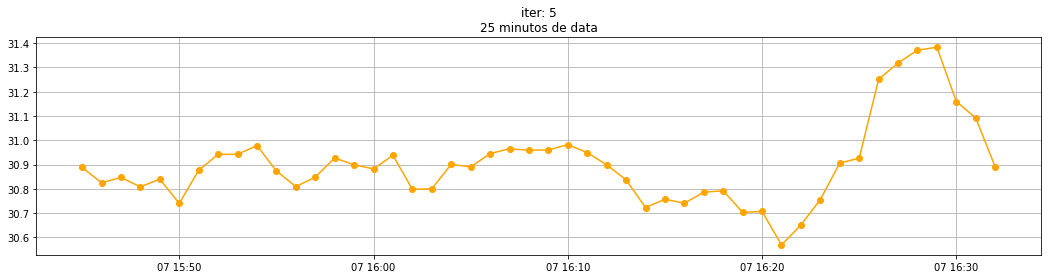

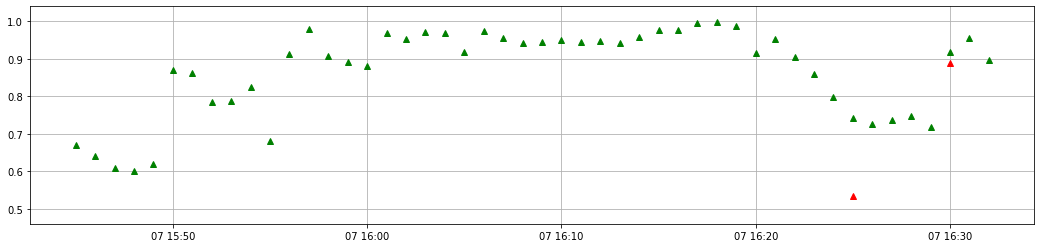

In [74]:
w = 150
ww = 75
n = 5
# w = 0
# ww = 200
plt.figure(figsize=(18, 4))
# plt.plot(index.to_list()[:w], SS[:w], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], "o", c='orange')
plt.grid()
plt.title(f"iter: {n}\n{n*5} minutos de data")
plt.show()

plt.figure(figsize=(18, 4))
bu, se, _ = get_b_s(minutos, lista, n)
# plt.plot(index.to_list()[:w], bu[:w], "^", c='green')
# plt.plot(index.to_list()[:w], se[:w], "^", c='red')
plt.plot(index.to_list()[w:-ww], bu[w:-ww], "^", c='green')
plt.plot(index.to_list()[w:-ww], se[w:-ww], "^", c='red')
plt.ylim(.46, 1.04)
plt.grid()
plt.show()

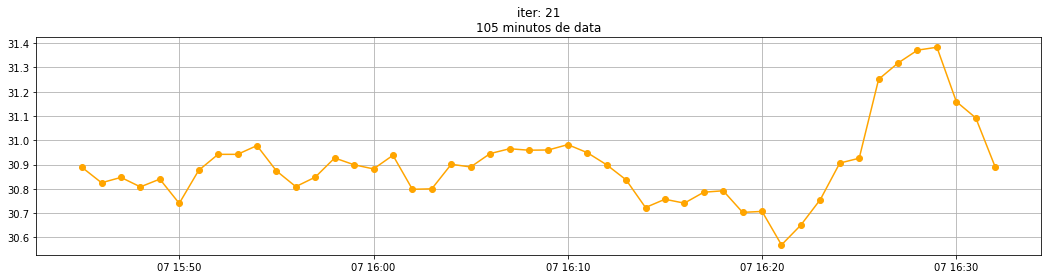

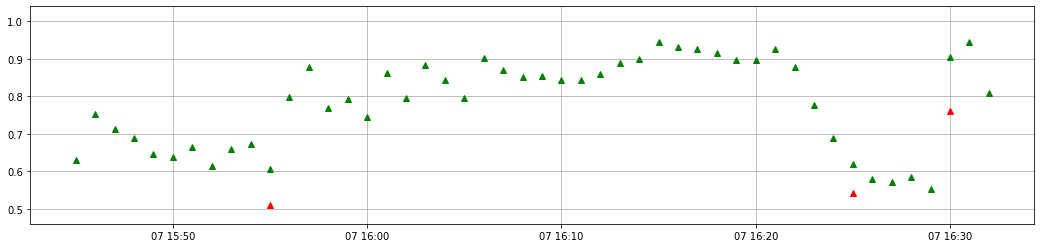

In [46]:
w = 150
ww = 75
n = 21

plt.figure(figsize=(18, 4))
# plt.plot(index.to_list()[:w], SS[:w], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], c='orange')
plt.plot(index.to_list()[w:-ww], SS[w:-ww], "o", c='orange')
plt.grid()
plt.title(f"iter: {n}\n{n*5} minutos de data")
plt.show()

plt.figure(figsize=(18, 4))
bu, se, _ = get_b_s(minutos, lista, n)
# plt.plot(index.to_list()[:w], bu[:w], "^", c='green')
# plt.plot(index.to_list()[:w], se[:w], "^", c='red')
plt.plot(index.to_list()[w:-ww], bu[w:-ww], "^", c='green')
plt.plot(index.to_list()[w:-ww], se[w:-ww], "^", c='red')
plt.ylim(.46, 1.04)
plt.grid()
plt.show()

In [184]:
todo = '''Tue Dec  7 12:03:00 2021 | 1 | [33] | Buy: 95.0% | 
Tue Dec  7 12:03:02 2021 | 1 | [33] | Buy: 95.0% | 
Tue Dec  7 12:03:10 2021 | 1 | [33] | Buy: 95.0% | 
Tue Dec  7 12:03:11 2021 | 1 | [33] | Buy: 95.0% | 
Tue Dec  7 12:03:11 2021 | 1 | [33] | Buy: 95.0% | 
Tue Dec  7 12:03:14 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:15 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:16 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:18 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:18 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:19 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:20 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:24 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:25 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:26 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:28 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:28 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:29 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:35 2021 | 1 | [31] | Buy: 95.0% | 
Tue Dec  7 12:03:40 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:41 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:43 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:44 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:45 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:46 2021 | 1 | [31] | Buy: 91.0% | 
Tue Dec  7 12:03:47 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:49 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:50 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:51 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:52 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:53 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:54 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:55 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:56 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:57 2021 | 1 | [31] | Buy: 89.0% | 
Tue Dec  7 12:03:58 2021 | 1 | [31] | Buy: 89.0% |'''#.split('\n')
len(todo)

1870

In [182]:
pro = np.array([float(i.split(":")[-1].split("%")[0].strip()) for i in todo]).mean()
pro

92.5

In [186]:
def str_2_vec(string):
    gg = []
    jj = []
    date = []
    for i in string.split('\n'):
        perc = i.split(": ")[-1].split("%")[0]
        perc2 = i.split(": ")[1].split("%")[0]
        fecha = i.split(" |")[0]
        date.append(fecha)
        gg.append(float(perc))
        jj.append(float(perc2))
    gg = np.array(gg)
    jj = np.array(jj)
    # print(date[0])
    # print()
    return gg, jj

In [187]:
str_2_vec(todo)

(array([95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95.,
        95., 95., 95., 95., 95., 95., 91., 91., 91., 91., 91., 91., 89.,
        89., 89., 89., 89., 89., 89., 89., 89., 89., 89.]),
 array([95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95., 95.,
        95., 95., 95., 95., 95., 95., 91., 91., 91., 91., 91., 91., 89.,
        89., 89., 89., 89., 89., 89., 89., 89., 89., 89.]))